In [46]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image,(678 , 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image,(678 , 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image,(678 , 381))

In [47]:
def compute_difference (bg_img , input_img ):
    difference_three_channel = cv2.absdiff(bg_img , input_img)
    difference_single_channel = np.sum(difference_three_channel, axis = 2) / 3
    difference_single_channel = difference_single_channel.astype(np.uint8)
    return difference_single_channel

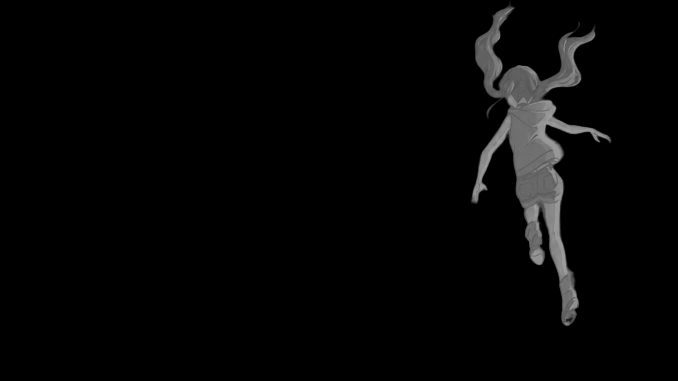

In [48]:
difference_single_channel = compute_difference(bg1_image,ob_image)
cv2_imshow(difference_single_channel)

In [49]:
def compute_binary_mask (difference_single_channel ) :
    _, difference_binary = cv2.threshold(difference_single_channel ,15 , 255 , 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

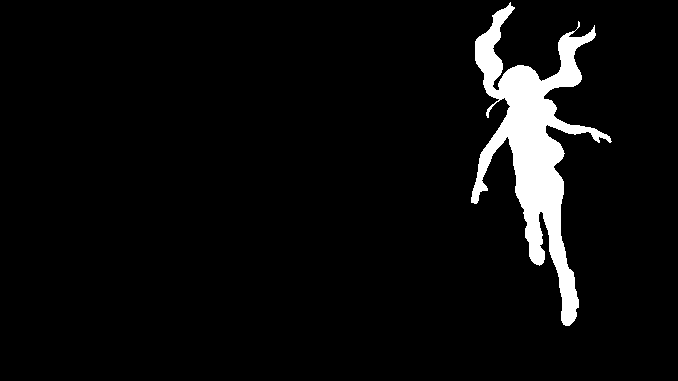

In [50]:
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

In [51]:
def replace_background (bg1_image,bg2_image,ob_image ) :
    difference_single_channel = compute_difference (bg1_image,ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask ==255 , ob_image , bg2_image)
    return output

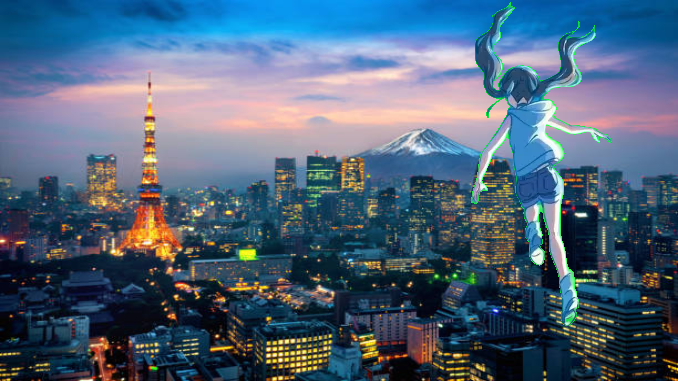

In [52]:
output = replace_background(bg1_image,bg2_image,ob_image)

cv2_imshow(output)